In [66]:
#Final Project: Xinran Li, Froilan Dinco, Esha Kale 

In [67]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [68]:
#Converting columns of adult and developing MECP2 expression levels in the dataset into dataframes

columns_develop = pd.read_csv(r'Columns_develop.csv')
columns_develop = pd.DataFrame(columns_develop)
columns_develop.index = range(1,1204)   
columns_develop = columns_develop.T   

columns_adult = pd.read_csv(r'Columns_adult.csv')
columns_adult = pd.DataFrame(columns_adult)
columns_adult.index = range(1,1015) 
columns_adult = columns_adult.T

In [69]:
#Converting rows of adult and developing MECP2 expression levels in the dataset into dataframes, and taking out the first index, which is an ID tag

expression_develop = pd.read_csv(r'Expression_develop.csv')
expression_develop = pd.DataFrame(expression_develop)

expression_develop = pd.read_csv(r'Expression_develop.csv', header = None)
expression_develop = expression_develop.set_index(0)

expression_adult = pd.read_csv(r'Expression_adult.csv')
expression_adult = pd.DataFrame(expression_adult)

expression_adult = pd.read_csv(r'Expression_adult.csv', header = None)
expression_adult = expression_adult.set_index(0)

In [70]:
#Joining the two dataframes from each type, column and row respectively

MECP2_adult = pd.concat([columns_adult, expression_adult])
MECP2_develop = pd.concat([columns_develop, expression_develop])

MECP2_adult.head()

,1,2,3,4,5,6,7,8,9,10,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
donor_id,9861,9861,9861,9861,9861,9861,9861,9861,9861,9861,...,15697,15697,15697,15697,15697,15697,15697,15697,15697,15697
donor_name,H0351.2001,H0351.2001,H0351.2001,H0351.2001,H0351.2001,H0351.2001,H0351.2001,H0351.2001,H0351.2001,H0351.2001,...,H0351.1016,H0351.1016,H0351.1016,H0351.1016,H0351.1016,H0351.1016,H0351.1016,H0351.1016,H0351.1016,H0351.1016
donor_age,24 years,24 years,24 years,24 years,24 years,24 years,24 years,24 years,24 years,24 years,...,55 years,55 years,55 years,55 years,55 years,55 years,55 years,55 years,55 years,55 years
donor_color,EC891D,EC891D,EC891D,EC891D,EC891D,EC891D,EC891D,EC891D,EC891D,EC891D,...,EB3B00,EB3B00,EB3B00,EB3B00,EB3B00,EB3B00,EB3B00,EB3B00,EB3B00,EB3B00
sample_well,154,859,97,123,539,194,458,257,281,131,...,165372106,-1,165372232,165372154,165372170,160535259,160535275,159226181,-1,160091917


In [71]:
#Transforming the data so that it can be read in rows. Calculating the mean expression from all probes

MECP2_adult_new = MECP2_adult.T
MECP2_adult_new['mean_expression'] = MECP2_adult_new[[1015900,1054224,1013374,1054225]].mean(axis=1)
MECP2_adult_new = MECP2_adult_new.set_index('donor_id')

MECP2_develop_new = MECP2_develop.T
MECP2_develop_new['mean_expression'] = MECP2_develop_new[[1015900,1054224,1013374,1054225]].mean(axis=1)
MECP2_develop_new = MECP2_develop_new.set_index('donor_id')

In [72]:
#Differential/descriptive statistics
#Subsetting the means which are greater or equal to 1, so that we have a short list of high expression.

Means_adult = MECP2_adult_new[MECP2_adult_new['mean_expression']>=1]
Means_develop = MECP2_develop_new[MECP2_develop_new['mean_expression']>=1]

In [73]:
#Differential/descriptive statistics
#There are some duplicates of the brain regions, here we are taking data from the unique structures

brainregions_adult_unique = Means_adult['structure_name'].unique()
brainregions_develop_unique = Means_develop['structure_name'].unique()

#len(brainregions_adult_unique) = 39 
#len(brainregions_develop_unique) = 32 

In [74]:
#For loop for appending the unique means into the unique structures dataset

mean_expression_unique_adult =[]
for meani in brainregions_adult_unique:
    meani = Means_adult[Means_adult['structure_name']== meani]['mean_expression']
    mean_expression_unique_adult.append(meani.mean())


In [75]:
#For loop for appending the unique means into the unique structures dataset

mean_expression_unique_develop =[]
for meani in brainregions_develop_unique:
    meani = Means_develop[Means_develop['structure_name']== meani]['mean_expression']
    mean_expression_unique_develop.append(meani.mean())

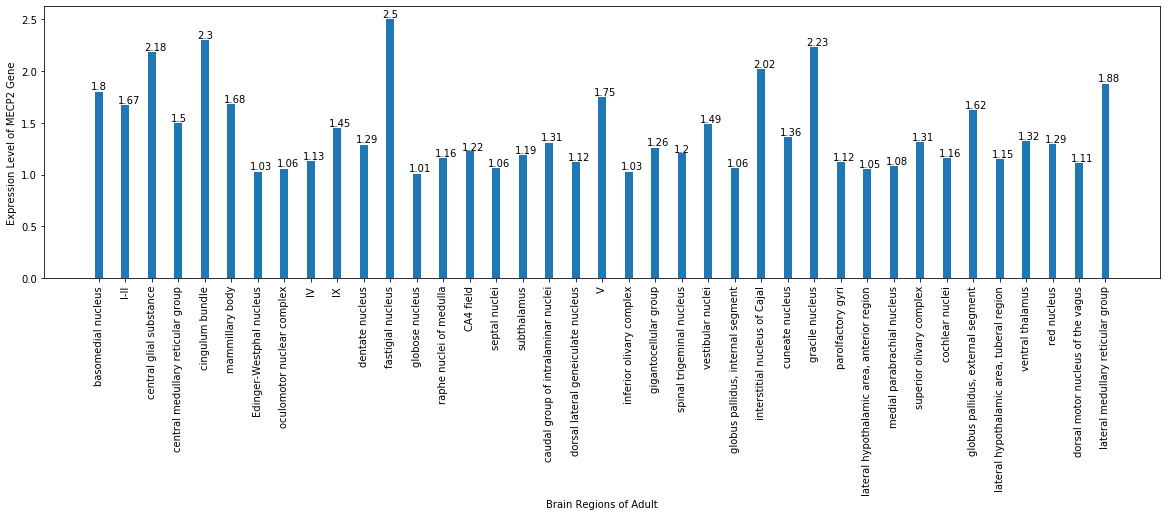

In [76]:
#Plotted bar graph for expression level of the MECP2 gene in Adult brain regions, where regions have an expression greater than or equal to one.

%matplotlib inline

fig = plt.figure(figsize=(20,5))
data = mean_expression_unique_adult

plt.bar(brainregions_adult_unique, data, width=0.3,)
plt.ylabel('Expression Level of MECP2 Gene')
plt.xlabel('Brain Regions of Adult')
plt.xticks(rotation=90)

rounded_data =  []
for num in data:
    new_num = round(num, 2)
    rounded_data.append(new_num)
for index,data in enumerate(rounded_data):
    plt.text(x=index-.3 , y =data+.02 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.show()





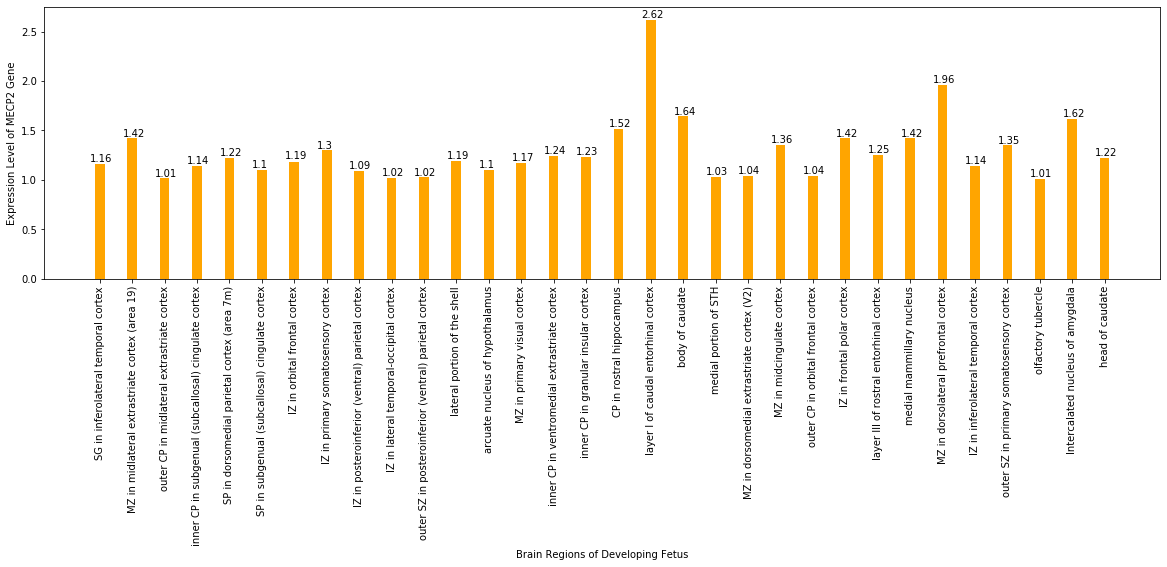

In [77]:
#Plotted bar graph for expression level of the MECP2 gene in developing brain regions, where regions have an expression greater than or equal to one.

%matplotlib inline

fig = plt.figure(figsize=(20,5))
data = mean_expression_unique_develop
plt.bar(brainregions_develop_unique, data, width=0.3, color= "orange")
plt.ylabel('Expression Level of MECP2 Gene')
plt.xlabel('Brain Regions of Developing Fetus')
plt.xticks(rotation=90)

rounded_data =  []
for num in data:
    new_num = round(num, 2)
    rounded_data.append(new_num)
for index,data in enumerate(rounded_data):
    plt.text(x=index-.3 , y =data+.02 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.show()




In [78]:
#Finding the same regions in both developing and adult brains, and their corresponding average expression

adult_structures =columns_adult.T['structure_name']

develop_structures =columns_develop.T['structure_name']

same_regions = set(adult_structures) & set(develop_structures)

adultmeans = []
developmeans= []

for i in same_regions:
    mean_i_adult = MECP2_adult_new[MECP2_adult_new['structure_name']== i].mean_expression
    adultmeans.append(mean_i_adult.mean())
    
for i in same_regions:
    mean_i_develop = MECP2_develop_new[MECP2_develop_new['structure_name']== i].mean_expression
    developmeans.append(mean_i_develop.mean())

    
len(same_regions)

18

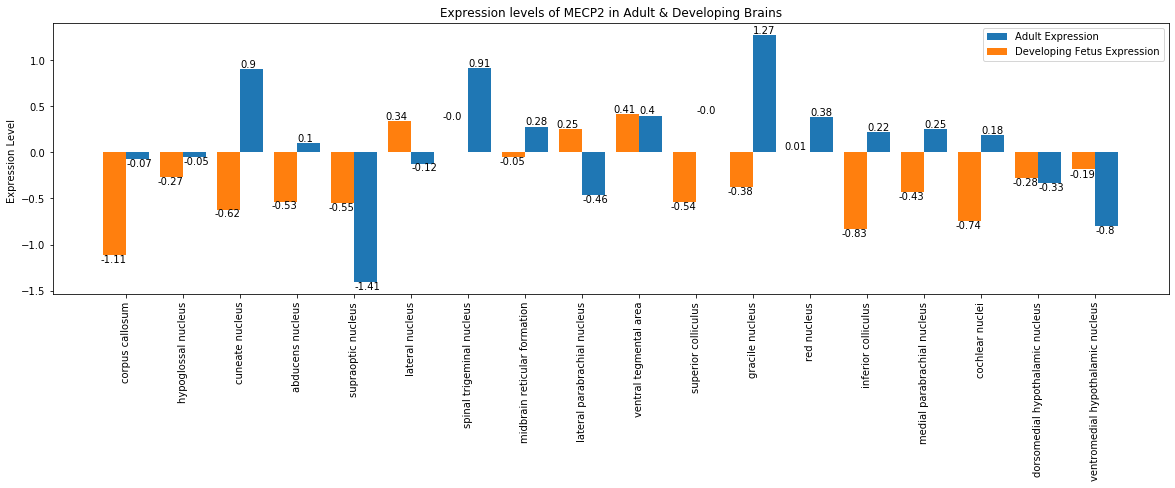

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(20,5))
ypos = np.arange(len(same_regions))

plt.xticks(ypos,same_regions)
plt.ylabel("Expression Level ")
plt.title("Expression levels of MECP2 in Adult & Developing Brains")
plt.xticks(rotation=90)

plt.bar(xpos+0.2,adultmeans, width=0.4, label="Adult Expression")
plt.bar(xpos-0.2,developmeans,width=0.4, label= "Developing Fetus Expression")
rounded_data_adult =  []
for num in adultmeans:
    new_num = round(num, 2)
    rounded_data_adult.append(new_num)
rounded_data_adult_adjust = []
for num in rounded_data_adult:
    if num > 0:
        y_num = round(num + .02,2)
    if num < 0:
        y_num = round(num -.08, 2)
    rounded_data_adult_adjust.append(y_num)
for index,data in enumerate(rounded_data_adult):
    plt.text(x=index , y =rounded_data_adult_adjust[index], s=f"{data}" , fontdict=dict(fontsize=10))
rounded_data_develop =  []
for num in developmeans:
    new_num = round(num, 2)
    rounded_data_develop.append(new_num)
rounded_data_develop_adjust = []
for num in rounded_data_develop:
    if num > 0:
        y_num = round(num + .02,2)
    if num < 0:
        y_num = round(num -.08, 2)
    rounded_data_develop_adjust.append(y_num)
for index,data in enumerate(rounded_data_develop):
    plt.text(x=index-0.45 , y =rounded_data_develop_adjust[index] , s=f"{data}" , fontdict=dict(fontsize=10))

plt.legend()